In [258]:
# Imports needed for the script
import numpy as np
import glob
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tweepy
import json
import pydot
import graphviz
import math
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from datetime import date

In [235]:
test = pd.read_csv (r'dataset_bot(1).csv', encoding='latin-1')

In [252]:
prediccion = pd.read_csv (r'datasetMP.csv', encoding='latin-1')

In [236]:
test.shape

(4011, 11)

In [253]:
prediccion.shape

(18416, 10)

In [237]:
test.head()
test.isna().sum().sum()

0

In [238]:
test["user_id"]

0       787405734442958848
1       796216118331310080
2       875949740503859204
3       756119643622735875
4                 55050269
               ...        
4006            4038367361
4007             534026385
4008            1686935701
4009    890685764257886209
4010              67429253
Name: user_id, Length: 4011, dtype: int64

In [239]:
test.sort_values(["user_registration"])

,user_id,user_name,screen_name,followers_count,description,verified,profile_image_default,protected,favourites_count,user_registration,bot
1116,245900053,b'Aaliyah Slaughter',His_Addiction94,7,0,0,0,0,1837,01-02-2011,1
2932,245920630,b'BigBodyCarti\xe2\x9c\xa8\xf0\x9f\x94\xaa',CartierHoeXXX,3224,1,0,0,0,71538,01-02-2011,0
1184,245900668,b'Baldasso - 2022 0/46',FabianoBaldasso,248962,0,0,0,0,22300,01-02-2011,0
1239,480782173,b'Pel\xc3\xa9',Pele,2769321,1,0,0,0,135,01-02-2012,0
656,480777445,b'Angie',angie_geminii,331,0,0,0,0,155,01-02-2012,0
...,...,...,...,...,...,...,...,...,...,...,...
1589,4078973908,b'J',Jhvcdfgbbvgh,10,0,0,0,0,957,31-10-2015,1
1383,232533199,b'IncredibleMrTim',IncredibleMrTim,23,0,0,0,0,1826,31-12-2010,0
720,451679919,b'USERNAME : CIARRA',glitteeergabby,674,1,0,0,0,3053,31-12-2011,0
1967,451679919,b'USERNAME : CIARRA',glitteeergabby,674,1,0,0,0,3053,31-12-2011,0


<BarContainer object of 138 artists>

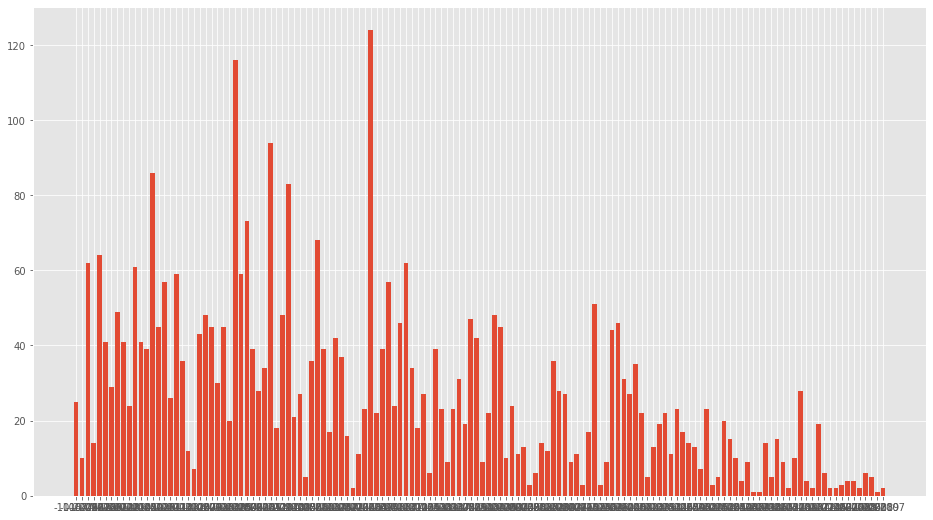

In [240]:
ocurrencies = {}
users = []
for index, row in test.iterrows():
    if (row['user_registration'][2:12] in ocurrencies and row['user_id'] not in users) :
        users.append(row['user_id'])
        ocurrencies[row['user_registration'][2:12]] += 1
    elif (row['user_registration'][2:12] in ocurrencies and row['user_id'] in users):
        continue
    else:
        users.append(row['user_id'])
        ocurrencies[row['user_registration'][2:12]] = 1
        
plt.bar(ocurrencies.keys(), ocurrencies.values())

In [241]:
#Mapeo de Datos
most_used = ['user_id','user_name','screen_name', 'followers_count', 'description', 'verified', 'profile_image_default', 'protected', 'favourites_count','user_registration']
mappedUserName = []
mappedAge = []
error_id = []
for index, row in test.iterrows():
    
    try:
        name = ""
        for i in range (len(row['user_name'].lower().split())):
            name+=row['user_name'].lower().split()[i]
        
        if name in row['screen_name'].lower():
            mappedUserName.append(1)
        else:
            mappedUserName.append(0)
            
        age = abs(2021 - int(row['user_registration'][6:10]))
        mappedAge.append(age)

    except:
        print(row['user_id'])
        error_id.append(row['user_id'])
        continue

test['mappedAge'] = mappedAge        
test['mappedUserName'] = mappedUserName
test['mappedFollowerCount'] = test['followers_count']
test['mappedDescription'] = test['description']
test['mappedVerified'] = test['verified']
test['mappedDefaultImage'] = test['profile_image_default']
test['mappedProtected'] = test['protected']
test['mappedFavouriteCount'] = test['favourites_count']


In [242]:
users_encoded = test.drop(most_used, axis = 1)
users_encoded

,bot,mappedAge,mappedUserName,mappedFollowerCount,mappedDescription,mappedVerified,mappedDefaultImage,mappedProtected,mappedFavouriteCount
0,1,5,0,1851,1,0,0,0,4
1,0,5,0,810,1,0,0,0,515
2,0,4,0,182,1,0,0,0,4328
3,0,5,0,659,1,0,0,0,12364
4,0,12,0,284296,1,0,0,0,5522
...,...,...,...,...,...,...,...,...,...
4006,1,6,0,447,1,0,0,0,0
4007,0,9,0,871,1,0,0,0,41350
4008,1,8,0,47,0,0,0,0,4515
4009,0,4,0,1,1,0,0,0,136


In [248]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(users_encoded))
depth_range = range(1, max_attributes + 1)


# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0: 1})
    for train_fold, valid_fold in cv.split(users_encoded):
        f_train = users_encoded.loc[train_fold]
        f_valid = users_encoded.loc[valid_fold]
        model = tree_model.fit(X = f_train.drop(list_a, axis=1), 
                               y = f_train['bot'])
        
        model = tree_model.fit(X = f_train.drop(list_a, axis=1), 
                               y = f_train["bot"]) 
        valid_acc = model.score(X = f_valid.drop(list_a, axis=1), 
                                y = f_valid["bot"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.806532
         2          0.811518
         3          0.841933
         4          0.840684
         5          0.869357
         6          0.870104
         7          0.867615
         8          0.861381
         9          0.861881


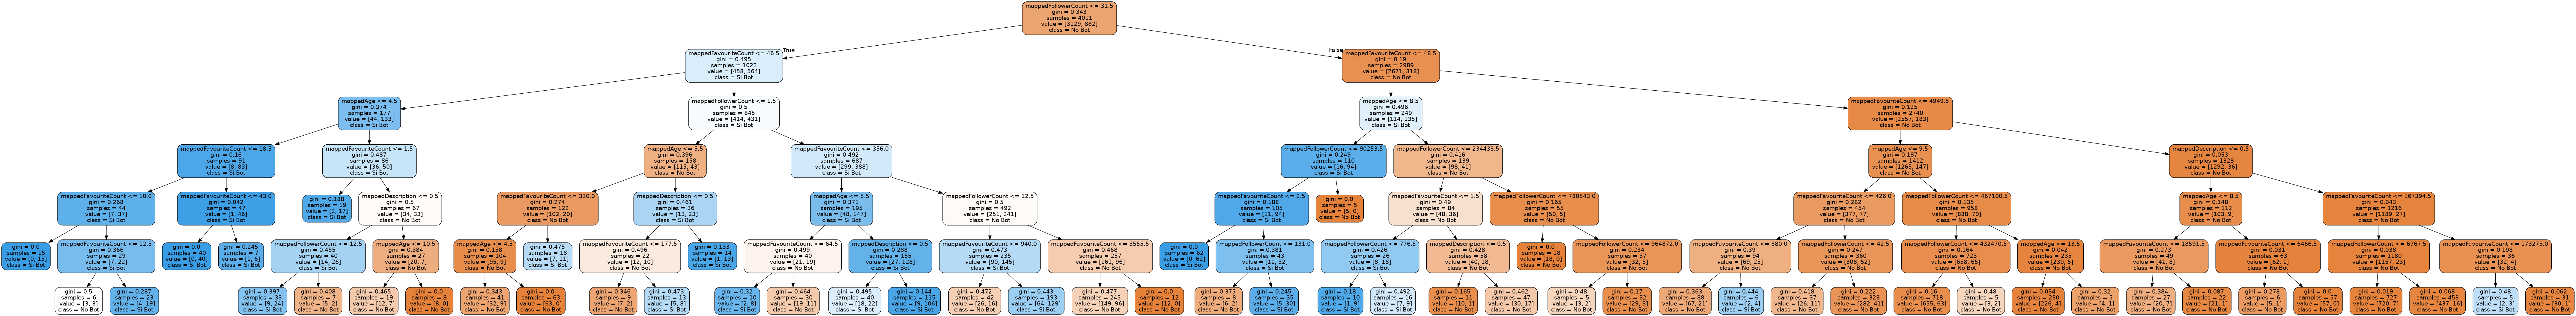

In [262]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = users_encoded['bot']
x_train = users_encoded.drop(list_a, axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 6,
                                            class_weight={0:1})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(users_encoded.drop(list_a, axis=1)),
                              #class_names =  list(users_encoded['bot']),
                              class_names = ['No Bot', 'Si Bot'],                             
                              rounded = True,
                              filled= True )
        
        
# Convertir el archivo .dot a png para poder visualizarlo

check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [261]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

87.88


In [263]:
si_bot = {}
no_bot = 0
inicio = time.time()
for index, row in prediccion.iterrows():
    name = ""
    for i in range (len(row['user_name'].lower().split())):
            name+=row['user_name'].lower().split()[i]
            
    if name in row['screen_name'].lower():
        inName=1
    else:
        inName=0
        
    age = abs(2021 - int(row['user_registration'][6:10]))
    
    x_test = pd.DataFrame(columns=('bot','mappedAge', 'mappedUserName', 'mappedFollowerCount','mappedDescription','mappedVerified','mappedDefaultImage','mappedProtected','mappedFavouriteCount'))
    x_test.loc[0] = (0,age,inName,int(row['followers_count']),int(row['description']),int(row['verified']),int(row['profile_image_default']),int(row['protected']),int(row['favourites_count']))
    y_pred = decision_tree.predict(x_test.drop(['bot'], axis = 1))
    if y_pred == 0:
        no_bot+=1
    else:
        si_bot[row["screen_name"]] = 1
    #print("Prediccion: " + str(y_pred))
    #y_proba = decision_tree.predict_proba(x_test.drop(['bot'], axis = 1))
    #print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2))+"%")

fin = time.time()
print(fin-inicio)
print(si_bot)


31.774600505828857
{'OscarMEmanuelli': 1, 'Mary60517498': 1, 'gabopalmaojeda': 1, 'Juanand51487975': 1, 'LescureErich': 1, 'legolasyj28': 1, 'Andioret_10': 1, 'Mezadiana_1503': 1, 'RodolfoBarriga4': 1, 'CamiloSotomayo7': 1, 'Frankokan': 1, 'arcarloza': 1, 'yoselintrainer': 1, 'DisenoUsach': 1, 'mil_strada': 1, 'ramonserey': 1, 'Confederacion9': 1, 'JorgeGo21881568': 1, 'Esmeral69443470': 1, 'WeslyRamos11': 1, 'cibermagda': 1, 'Soledad13643743': 1, 'ChrisMurilloZ': 1, 'Fernand77431275': 1, '4taLosAngeles': 1, 'EnfoqueBioBio': 1, 'Nube95974164': 1, 'Ggogux': 1, 'Ivojargmailcom1': 1, 'ivonne_ej': 1, 'FarmaciaBueras': 1, 'BatiksCL': 1, 'exequieljacques': 1, 'Josefin29790664': 1, 'RomyRebolledol': 1, 'gmorales22_': 1, 'cjmq_social': 1, 'rcparinacota': 1, 'fredypav': 1, 'flores_novoa': 1, 'LeoArceTapia1': 1, 'acorazado53': 1, 'JOSEART10496046': 1, 'JorgePave': 1, 'conapiuqueoscar': 1, 'Jeanphi71920737': 1, 'Waraneda': 1, 'Emma_2021_9': 1, 'Ron52751064': 1, 'Genesis64460123': 1, 'Yuyi_Lo': 1,